In [2]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
from pandas import DataFrame, MultiIndex, concat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import read_excel

from matplotlib import pyplot as plt
import seaborn as sb

# 분산분석을 위한 라이브러리
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 사후분석을 위한 라이브러리
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind

from math import sqrt
from scipy.stats import t
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner, levene, chi2_contingency

# helper 참조
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import normality_test, equal_variance_test, independence_test, all_test

In [3]:
df = read_excel("https://data.hossam.kr/E02/reading.xlsx")
df

독서방법  점수
0     B   6
1     B   9
2     B   2
3     B  16
4     D   7
5     D   7
6     D  12
7     D  10
8     D  16
9     S  11
10    S   7
11    S   4
12    S   7
13    S   7

In [4]:
target = []
for i in df['독서방법']:
    if 'B' in i:
        target.append(0)
    elif 'D' in i:
        target.append(1)
    else:
        target.append(3)
print(target)
df['독서방법'] = target

[0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3]


In [5]:
df.columns = ['read', 'grade']
# df

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


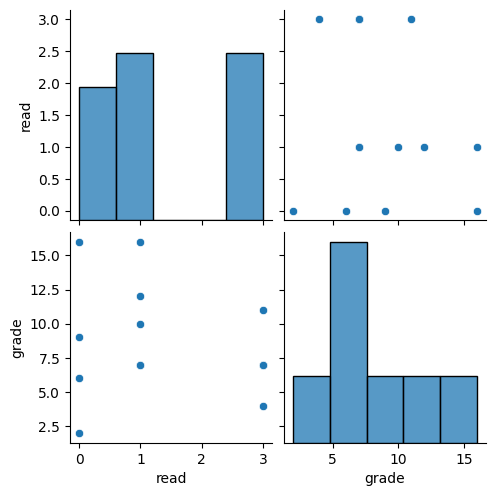

In [6]:
sb.pairplot(df, size=2.5, diag_kind='hist')
plt.show()

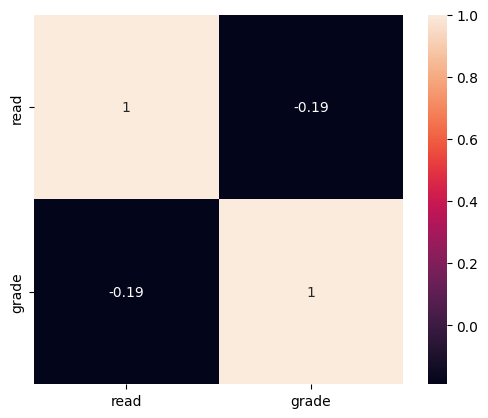

In [7]:
sb.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

In [8]:
# stats.pearsonr(df['read'], df['grade'])

#### 문제 2

In [9]:
df = read_excel("https://data.hossam.kr/E02/tomato.xlsx")
df

효소함량  모종성장
0       0  10.8
1       0   9.1
2       0  13.5
3       0   9.2
4    1000  11.1
5    1000  11.2
6    1000   8.2
7    1000  11.3
8    5000   5.4
9    5000   4.6
10   5000   7.4
11   5000   5.0
12  10000   5.8
13  10000   5.3
14  10000   3.2
15  10000   7.5

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   효소함량    16 non-null     int64  
 1   모종성장    16 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 388.0 bytes


In [11]:
df.columns = ['Enzyme', 'seedling']

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


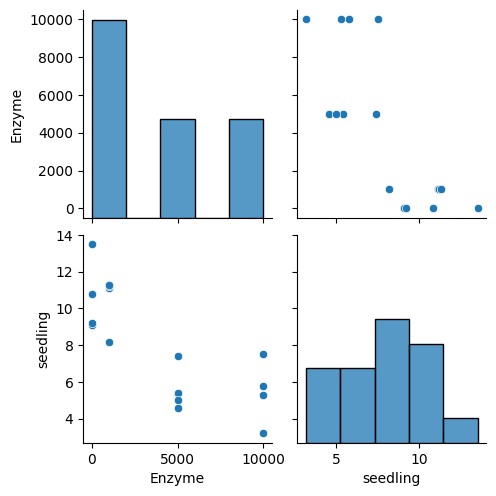

In [12]:
sb.pairplot(df, size=2.5, diag_kind='hist')
plt.show()

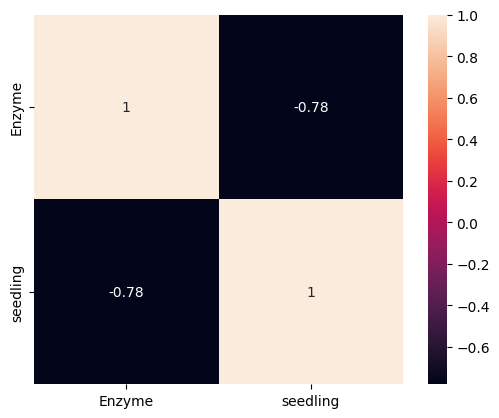

In [13]:
sb.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

### 결론 해석
###### 모종과 효소에는 음의 상관관계가 강하게있다.

#### 문제 3

In [14]:
df = read_excel("https://data.hossam.kr/E02/edu.xlsx")
df

교육방법  국어  영어
0      1  65  82
1      1  87  79
2      1  73  85
3      1  79  60
4      1  81  65
5      1  69  70
6      1  55  79
7      1  76  80
8      1  77  76
9      1  70  90
10     1  88  68
11     2  75  72
12     2  69  75
13     2  83  93
14     2  81  85
15     2  72  60
16     2  79  65
17     2  85  88
18     2  89  92
19     2  90  83
20     2  77  93
21     2  95  78

In [15]:
df1 = df.filter(['교육방법', '국어'])
df1.rename(columns={'국어':'점수'}, inplace=True)


In [16]:
df.columns = ['method', 'korean', 'English']
df.head()
# target = []
# for i in df['method']:
#     if 1 == i:
#         target.append(1)
#     else:
#         target.append(None)
# df['target'] = target
# df.isnull().sum()
df1 = df[df['method'].apply(lambda x : x in [1])]
print(df1)
df2 = df[df['method'].apply(lambda x : x in [2])]
print(df2)
df

    method  korean  English
0        1      65       82
1        1      87       79
2        1      73       85
3        1      79       60
4        1      81       65
5        1      69       70
6        1      55       79
7        1      76       80
8        1      77       76
9        1      70       90
10       1      88       68
    method  korean  English
11       2      75       72
12       2      69       75
13       2      83       93
14       2      81       85
15       2      72       60
16       2      79       65
17       2      85       88
18       2      89       92
19       2      90       83
20       2      77       93
21       2      95       78


method  korean  English
0        1      65       82
1        1      87       79
2        1      73       85
3        1      79       60
4        1      81       65
5        1      69       70
6        1      55       79
7        1      76       80
8        1      77       76
9        1      70       90
10       1      88       68
11       2      75       72
12       2      69       75
13       2      83       93
14       2      81       85
15       2      72       60
16       2      79       65
17       2      85       88
18       2      89       92
19       2      90       83
20       2      77       93
21       2      95       78

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


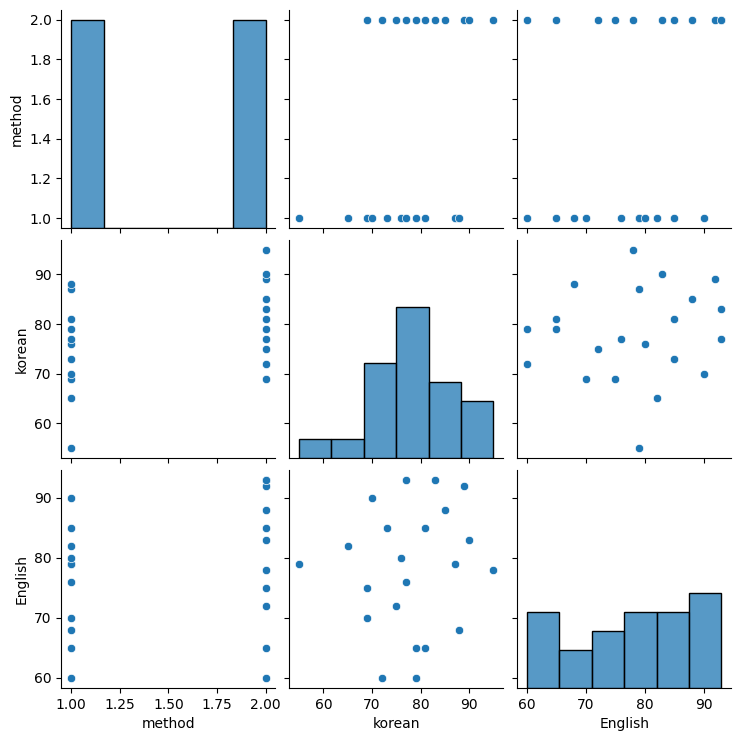

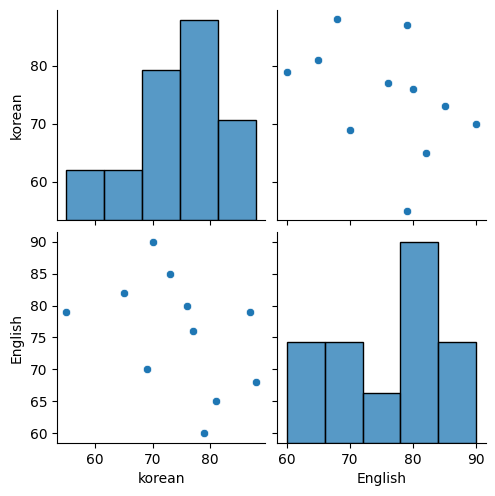

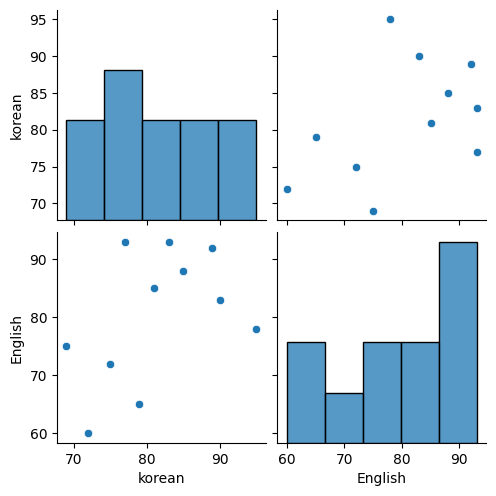

In [17]:
df1 = df1.drop(['method'], axis=1)
df2 = df2.drop(['method'], axis=1)
sb.pairplot(df, size=2.5, diag_kind='hist')
sb.pairplot(df1, size=2.5, diag_kind='hist')
sb.pairplot(df2, size=2.5, diag_kind='hist')
plt.show()

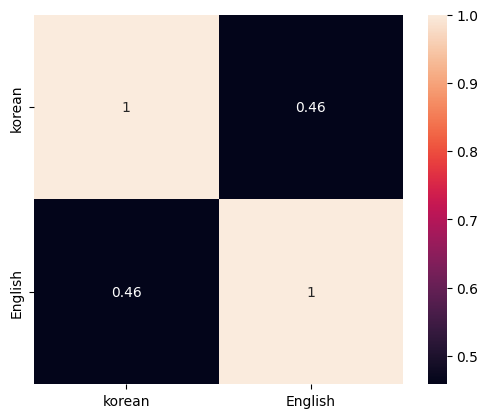

In [18]:
sb.heatmap(data=df2.corr(), square=True, annot=True, cbar=True)
plt.show()

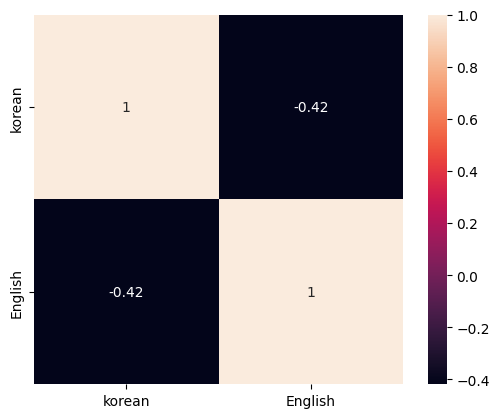

In [19]:
sb.heatmap(data=df1.corr(), square=True, annot=True, cbar=True)
plt.show()

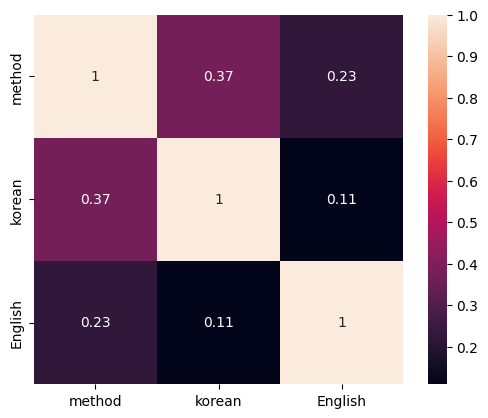

In [20]:
sb.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

#### 결론
##### 공부방법에 따른 국어점수는 약한 양의 관계가 나타나지만
##### 영어 점수와 같은경우 별다른 차이를 보이지 못한다.
###### 각각의 그룹을 나누어보면 교육방법 1의 경우 영어와 국어점수의 약한 양의 상관관계를 보이고
###### 영어의 경우 약한 음의상관관계를 보인다.
###### 한과목이 이미 충분한 학생의 경우 한과목 특화하게 공부를 잘시키고 싶으면 2번 공부방법을 택하는 느낌

In [21]:
df = read_excel("https://data.hossam.kr/E02/edu.xlsx")
df

교육방법  국어  영어
0      1  65  82
1      1  87  79
2      1  73  85
3      1  79  60
4      1  81  65
5      1  69  70
6      1  55  79
7      1  76  80
8      1  77  76
9      1  70  90
10     1  88  68
11     2  75  72
12     2  69  75
13     2  83  93
14     2  81  85
15     2  72  60
16     2  79  65
17     2  85  88
18     2  89  92
19     2  90  83
20     2  77  93
21     2  95  78

In [22]:
df1 = df.filter(['교육방법', '국어'])
df1.rename(columns={'국어': '점수'}, inplace=True)
df1['과목'] = '국어'
df1

교육방법  점수  과목
0      1  65  국어
1      1  87  국어
2      1  73  국어
3      1  79  국어
4      1  81  국어
5      1  69  국어
6      1  55  국어
7      1  76  국어
8      1  77  국어
9      1  70  국어
10     1  88  국어
11     2  75  국어
12     2  69  국어
13     2  83  국어
14     2  81  국어
15     2  72  국어
16     2  79  국어
17     2  85  국어
18     2  89  국어
19     2  90  국어
20     2  77  국어
21     2  95  국어

In [23]:
df2 = df.filter(['교육방법', '영어'])
df2.rename(columns={'영어': '점수'}, inplace=True)
df2['과목'] = '영어'
df2

교육방법  점수  과목
0      1  82  영어
1      1  79  영어
2      1  85  영어
3      1  60  영어
4      1  65  영어
5      1  70  영어
6      1  79  영어
7      1  80  영어
8      1  76  영어
9      1  90  영어
10     1  68  영어
11     2  72  영어
12     2  75  영어
13     2  93  영어
14     2  85  영어
15     2  60  영어
16     2  65  영어
17     2  88  영어
18     2  92  영어
19     2  83  영어
20     2  93  영어
21     2  78  영어

In [24]:
df3 = concat([df1, df2])
df3

교육방법  점수  과목
0      1  65  국어
1      1  87  국어
2      1  73  국어
3      1  79  국어
4      1  81  국어
5      1  69  국어
6      1  55  국어
7      1  76  국어
8      1  77  국어
9      1  70  국어
10     1  88  국어
11     2  75  국어
12     2  69  국어
13     2  83  국어
14     2  81  국어
15     2  72  국어
16     2  79  국어
17     2  85  국어
18     2  89  국어
19     2  90  국어
20     2  77  국어
21     2  95  국어
0      1  82  영어
1      1  79  영어
2      1  85  영어
3      1  60  영어
4      1  65  영어
5      1  70  영어
6      1  79  영어
7      1  80  영어
8      1  76  영어
9      1  90  영어
10     1  68  영어
11     2  72  영어
12     2  75  영어
13     2  93  영어
14     2  85  영어
15     2  60  영어
16     2  65  영어
17     2  88  영어
18     2  92  영어
19     2  83  영어
20     2  93  영어
21     2  78  영어

In [25]:
df3['과목'] = df3['과목'].map({'국어': 1, '영어': 2})
df3

교육방법  점수  과목
0      1  65   1
1      1  87   1
2      1  73   1
3      1  79   1
4      1  81   1
5      1  69   1
6      1  55   1
7      1  76   1
8      1  77   1
9      1  70   1
10     1  88   1
11     2  75   1
12     2  69   1
13     2  83   1
14     2  81   1
15     2  72   1
16     2  79   1
17     2  85   1
18     2  89   1
19     2  90   1
20     2  77   1
21     2  95   1
0      1  82   2
1      1  79   2
2      1  85   2
3      1  60   2
4      1  65   2
5      1  70   2
6      1  79   2
7      1  80   2
8      1  76   2
9      1  90   2
10     1  68   2
11     2  72   2
12     2  75   2
13     2  93   2
14     2  85   2
15     2  60   2
16     2  65   2
17     2  88   2
18     2  92   2
19     2  83   2
20     2  93   2
21     2  78   2

In [26]:
formula = '점수 ~ C(교육방법)*C(과목)'
lm = ols(formula, df3).fit()
anova = anova_lm(lm)
anova

df       sum_sq     mean_sq         F    PR(>F)
C(교육방법)         1.0   355.113636  355.113636  3.845870  0.056857
C(과목)           1.0     0.204545    0.204545  0.002215  0.962695
C(교육방법):C(과목)   1.0    14.204545   14.204545  0.153835  0.696979
Residual       40.0  3693.454545   92.336364       NaN       NaN